In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./prostate.csv')

In [3]:
X = data.drop('lpsa', axis=1)
y = data['lpsa']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

With the training subset of the prostate data, train a least-squares regression model with all predictors.

In [5]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

Use the testing subset to compute the test error (average squared-error loss) using the fitted least-squares regression model.

In [6]:

y_pred = lr_model.predict(X_test)
test_error_lr = mean_squared_error(y_test, y_pred)
print(f"Test error (Least Squares): {test_error_lr}")


Test error (Least Squares): 0.4962146804465276


Train a ridge regression model and tune the value of lambda, i.e., for a sequence of lambda find the value of lambda that approximately minimizes the test error.

In [7]:

lambdas = np.logspace(-4, 4, 100)
train_errors = []
test_errors = []
coefs = []

for l in lambdas:
    ridge_model = Ridge(alpha=l)
    ridge_model.fit(X_train, y_train)
    coefs.append(ridge_model.coef_)
    train_errors.append(mean_squared_error(y_train, ridge_model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, ridge_model.predict(X_test)))

min_test_error = min(test_errors)
optimal_lambda = lambdas[test_errors.index(min_test_error)]
print(f"Optimal lambda (Ridge): {optimal_lambda}")
print(f"Minimum test error (Ridge): {min_test_error}")


Optimal lambda (Ridge): 1.9179102616724888
Minimum test error (Ridge): 0.49349764564756365


Create a figure that shows the training and test error associated with ridge regression as a function of lambda.

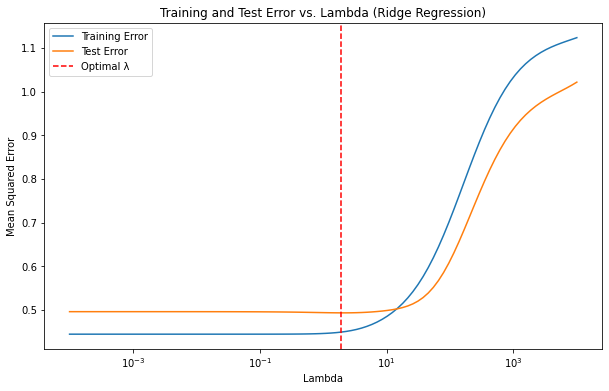

In [8]:

plt.figure(figsize=(10, 6))
plt.plot(lambdas, train_errors, label='Training Error')
plt.plot(lambdas, test_errors, label='Test Error')
plt.axvline(optimal_lambda, color='red', linestyle='--', label='Optimal λ')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Error vs. Lambda (Ridge Regression)')
plt.legend()
plt.show()


Create a path diagram of the ridge regression analysis, similar to HTF Figure 3.8.

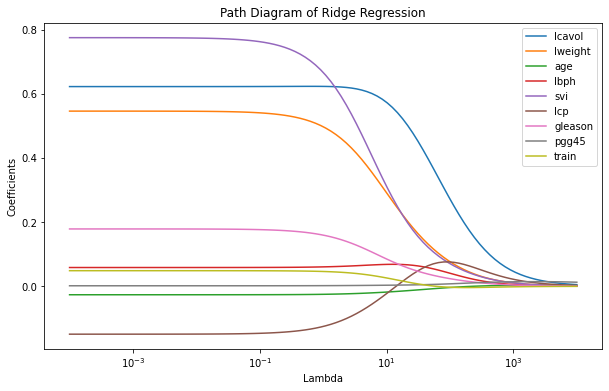

In [9]:

plt.figure(figsize=(10, 6))
coefs = np.array(coefs)
for i in range(coefs.shape[1]):
    plt.plot(lambdas, coefs[:, i], label=X.columns[i])

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Path Diagram of Ridge Regression')
plt.legend()
plt.show()
